<a href="https://colab.research.google.com/github/Eng-Dan/air-freight-market-share/blob/master/Case_Market_Share_Cargas_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

...bla bla bla...

# Link para as fontes de dados públicos

[DADOS ESTATÍSTICOS DO TRANSPORTE AÉREO](https://www.anac.gov.br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/dados-estatisticos-do-transporte-aereo)

* [Metadados do conjunto de dados: Dados Estatísticos do Transporte Aéreo](https://www.anac.gov.br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/dados-estatisticos-do-transporte-aereo/48-dados-estatisticos-do-transporte-aereo)

* [Voos e operações aéreas - Dados Estatísticos do Transporte Aéreo - Formato CSV](https://sistemas.anac.gov.br/dadosabertos/Voos%20e%20opera%C3%A7%C3%B5es%20a%C3%A9reas/Dados%20Estat%C3%ADsticos%20do%20Transporte%20A%C3%A9reo/)

# Configurações e bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dicionário de dados


* `passageiros_pagos`: Refere-se aos passageiros que ocupam assentos comercializados ao público e que geram receita, com a compra de assentos, para a empresa de transporte aéreo. Incluem-se nesta definição as pessoas que viajam em virtude de ofertas promocionais, as que se valem dos programas de fidelização de clientes, as que se valem dos descontos concedidos pelas empresas, as que viajam com tarifas preferenciais, as pessoas que compram passagem no balcão ou através do site de empresa de transporte aéreo e as pessoas que compram passagem em agências de viagem.

* `carga_paga_km`: Refere-se ao volume de Carga Paga (kg) em cada quilômetro, ou seja, a soma do produto entre a quantia (kg) de carga paga e a distâncias das etapas.

$$
carga\ paga_{km} = \sum_{etapa=1}^{etapa=n}(Peso\ carga_{kg} × Distância_{km})_{etapa}
$$

* `carga_paga_kg`: Refere-se à quantidade total, expressa em quilogramas, de todos os bens que tenham sido transportados na aeronave, exceto correio e bagagem, e tenham gerado receitas direta ou indireta para a empresa aérea.

* `decolagens`: Refere-se ao número de decolagens que ocorreram entre os aeródromos de origem e destino da etapa.

# Dataset e qualidade dos dados

In [3]:
arquivo_csv = '/content/drive/MyDrive/Colab Notebooks/Datasets/case_market_share.csv'

Para a análise e manipulação dos dados, será utilizado um dataframe em Pandas.
Atribuindo `df` como o nome do dataframe, o seguinte método carrega os dados do arquivo ".csv".

In [4]:
df = pd.read_csv(arquivo_csv, sep=';', encoding='windows-1252')

In [5]:
df.shape

(13272, 11)

Primeiramente vamos visualizar o conteúdo dos dados com base nos 10 primeiras registros.

In [6]:
df.head(10)

,empresa,ano,mês,origem,aeroporto_origem,destion,aeroporto_destino,tipo_voo,passageiros_pagos,carga_paga_kg,decolagens
0,A,2021,10,BEL,BELÉM,BEL,BELÉM,DOMÉSTICA,6.0,27.0,1.0
1,A,2021,10,BEL,BELÉM,BEL,BELÉM,DOMÉSTICA,0.0,0.0,NaN
2,A,2021,10,BEL,BELÉM,MAB,MARABÁ,DOMÉSTICA,0.0,0.0,1.0
3,A,2021,10,BEL,BELÉM,MEU,ALMEIRIM,DOMÉSTICA,128.0,2237.0,23.0
4,A,2021,10,BEL,BELÉM,BVS,BREVES,DOMÉSTICA,171.0,2218.0,33.0
5,A,2021,10,BEL,BELÉM,GGF,ALMEIRIM,DOMÉSTICA,0.0,0.0,NaN
6,A,2021,10,BPG,BARRA DO GARÇAS,CGB,VÁRZEA GRANDE,DOMÉSTICA,119.0,1573.0,21.0
7,A,2021,10,BPG,BARRA DO GARÇAS,GYN,GOIÂNIA,DOMÉSTICA,16.0,115.0,3.0
8,A,2021,10,BPG,BARRA DO GARÇAS,QDV,JUNDIAÍ,DOMÉSTICA,0.0,0.0,1.0
9,A,2021,10,CNF,CONFINS,CNF,CONFINS,DOMÉSTICA,0.0,0.0,1.0


Podemos observar alguns pontos a serem trabalhados no dataset:

1. Para efeitos desse estudo, serão desconsideradas as linhas em que o número de passageiros pagos e carga paga for igual a 0.

2. Existem registros em que o aeroporto de destino é o mesmo de origem:

    Esse registros devem ser desconsiderados. 

2. Dados contêm valores ausentes:
    
    Podemos ver que na culuna `decolagens` há valores do tipo "NaN" (**N**ot **a** **N**umber) ou nulos (*null*). Nesse caso, segue necessário uma melhor avaliação da qualidade dos registros de cada linha em relação à valores ausentes em todas as colunas.



## Tratamento de registros inválidos e valores ausentes

Método para remover registros em que `passageiros_pagos` e `carga_paga` são iguais a 0:

In [7]:
df = df[(df.passageiros_pagos > 0) | (df.carga_paga_kg > 0)]

In [8]:
df.shape

(10738, 11)

Método para remover registros em que `origem` e `destino` são iguais:

In [9]:
df.drop(df[df.origem == df.destion].index, inplace=True)

In [10]:
df.shape

(10710, 11)

Método para verificar quantidade de valores ausentes em cada coluna:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10710 entries, 3 to 13267
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   empresa            10710 non-null  object 
 1   ano                10710 non-null  int64  
 2   mês                10710 non-null  int64  
 3   origem             10710 non-null  object 
 4   aeroporto_origem   10710 non-null  object 
 5   destion            10710 non-null  object 
 6   aeroporto_destino  10710 non-null  object 
 7   tipo_voo           10710 non-null  object 
 8   passageiros_pagos  10710 non-null  float64
 9   carga_paga_kg      10710 non-null  float64
 10  decolagens         10467 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1004.1+ KB


Podemos confirmar que o dataset agora tem um total de 10710 registros, contudo a coluna `decolagens`é a única que possui valores ausentes.

* O que há nesses registros em que existem valores ausentes?

Vamos filtrar e visualizar essas linhas para ter uma ideia melhor do que pode ser.

In [12]:
df[df.decolagens.isnull()]

,empresa,ano,mês,origem,aeroporto_origem,destion,aeroporto_destino,tipo_voo,passageiros_pagos,carga_paga_kg,decolagens
92,A,2021,1,BEL,BELÉM,GYN,GOIÂNIA,DOMÉSTICA,20.0,0.0,NaN
100,A,2021,1,BEL,BELÉM,POA,PORTO ALEGRE,DOMÉSTICA,125.0,0.0,NaN
103,A,2021,1,BEL,BELÉM,PVH,PORTO VELHO,DOMÉSTICA,449.0,0.0,NaN
172,A,2021,1,CNF,CONFINS,PMW,PALMAS,DOMÉSTICA,287.0,0.0,NaN
177,A,2021,1,CNF,CONFINS,SDU,RIO DE JANEIRO,DOMÉSTICA,225.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13043,C,2021,10,FOR,FORTALEZA,MCP,MACAPÁ,DOMÉSTICA,18.0,142.0,NaN
13044,C,2021,10,FOR,FORTALEZA,PVH,PORTO VELHO,DOMÉSTICA,18.0,103.0,NaN
13151,C,2021,10,MCP,MACAPÁ,FOR,FORTALEZA,DOMÉSTICA,14.0,0.0,NaN
13168,C,2021,10,PVH,PORTO VELHO,FOR,FORTALEZA,DOMÉSTICA,27.0,0.0,NaN


A principio, não foi possível estabelecer uma correlação de causa para valores ausentes entre as colunas `passageiros_pagos`, `carga_paga_kg` e `decolagens`.

Sendo assim, vamos avaliar de forma quantitativa baseado em percentual de registros com valores ausentes, para cada uma das três colunas citadas acima, em relação ao total de linhas do dataset.

In [13]:
# pax_null = round((1 - (df.passageiros_pagos.count() / df.shape[0])) * 100, 2)
# carga_null = round((1 - (df.carga_paga_kg.count() / df.shape[0])) * 100, 2)

decolagens_null = round(df[df.decolagens.isnull()].shape[0] / df.shape[0] * 100, 2)

# print('Coluna passageiros_pagos: ' + str(pax_null) + '% de valores ausentes')
# print('Coluna carga_paga_kg: ' + str(carga_null) + '% de valores ausentes')

print('Coluna decolagens: ' + str(decolagens_null) + '% de valores ausentes')

Coluna decolagens: 2.27% de valores ausentes


Método para descartar os registros que contém valores ausentes:

In [14]:
df = df.dropna()

In [15]:
df

,empresa,ano,mês,origem,aeroporto_origem,destion,aeroporto_destino,tipo_voo,passageiros_pagos,carga_paga_kg,decolagens
3,A,2021,10,BEL,BELÉM,MEU,ALMEIRIM,DOMÉSTICA,128.0,2237.0,23.0
4,A,2021,10,BEL,BELÉM,BVS,BREVES,DOMÉSTICA,171.0,2218.0,33.0
6,A,2021,10,BPG,BARRA DO GARÇAS,CGB,VÁRZEA GRANDE,DOMÉSTICA,119.0,1573.0,21.0
7,A,2021,10,BPG,BARRA DO GARÇAS,GYN,GOIÂNIA,DOMÉSTICA,16.0,115.0,3.0
11,A,2021,10,CNF,CONFINS,QDV,JUNDIAÍ,DOMÉSTICA,0.0,1376.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
13262,C,2021,10,VIX,VITÓRIA,BSB,BRASÍLIA,DOMÉSTICA,5882.0,47320.0,41.0
13264,C,2021,10,VIX,VITÓRIA,GRU,GUARULHOS,DOMÉSTICA,96.0,0.0,1.0
13265,C,2021,10,VIX,VITÓRIA,GRU,GUARULHOS,DOMÉSTICA,17351.0,159666.0,122.0
13266,C,2021,10,VIX,VITÓRIA,SDU,RIO DE JANEIRO,DOMÉSTICA,8479.0,31409.0,74.0


## Diferença de valores acumulados entre os datasets com e sem valores ausentes

As tabelas abaixo, apresentam as somas de valores de cada empresa para o periodo de janeiro à outubro de 2021.

In [16]:
# table_a = df[['empresa', 'passageiros_pagos', 'carga_paga_kg', 'decolagens']]\
#             .groupby(by=['empresa'])\
#             .sum()\
#             .sort_values(by=['empresa'], ascending=True)\
#             .reset_index()

In [17]:
# table_b = df1[['empresa', 'passageiros_pagos', 'carga_paga_kg', 'decolagens']]\
#             .groupby(by=['empresa'])\
#             .sum()\
#             .sort_values(by=['empresa'], ascending=True)\
#             .reset_index()

In [18]:
# table_a # <-- com base no dataset que contem valores ausentes.

In [19]:
# table_b # <-- com base no dataset que não contem valores ausentes.

Validação por diferença percentual na soma total de `carga_paga_kg` para cada empresa.

In [20]:
# diff_empresa_a = round(((table_a.carga_paga_kg[0] - table_b.carga_paga_kg[0]) / table_a.carga_paga_kg[0]) * 100, 1)
# diff_empresa_b = round(((table_a.carga_paga_kg[1] - table_b.carga_paga_kg[1]) / table_a.carga_paga_kg[1]) * 100, 1)
# diff_empresa_c = round(((table_a.carga_paga_kg[2] - table_b.carga_paga_kg[2]) / table_a.carga_paga_kg[2]) * 100, 1)

# print('Empresa A: ' + str(diff_empresa_a) + '% de perda de representatividade')
# print('Empresa B: ' + str(diff_empresa_b) + '% de perda de representatividade')
# print('Empresa C: ' + str(diff_empresa_c) + '% de perda de representatividade')

Os valores acima mostram que após eliminar as linhas que continham valores nulos, não houve perda significativa na representatividade dos dados de `carga_paga_kg`. 

# Análise - Parte 1

1. Qual é o market share carga paga acumulado período em cada empresa?

2. Como foi a evolução do total de carga transportada por mês por cada empresa?

3. Qual é a média de carga paga transportada por voo?

4. Há alguma relação entre a quantidade de carga paga e frequencia de voos? E com relação a número de passageiros pagos?

Antes de prosseguir, vamos enriquecer os dados adicionando novas colunas para análise.

Coluna `rota`:
* Voo de GRU a MAO: rota GRUMAO
* Voo de MAO a GRU: rota MAOGRU

Coluna `carga_por_decolagem`:
$$
carga\_por\_decolagem = \frac{carga\_paga\_kg}{decolagens}
$$

Coluna `pax_por_decolagem`:
$$
pax\_por\_decolagem = \frac{passageiros\_pagos}{decolagens}
$$



In [21]:
# Adiciona a coluna "rota"
df['rota'] = df.origem + df.destion

In [22]:
# Adiciona a coluna "carga_por_decolagem"
df['carga_por_decolagem'] = df.carga_paga_kg / df.decolagens

In [23]:
# Adiciona a coluna "pax_por_decolagem"
df['pax_por_decolagem'] = df.passageiros_pagos / df.decolagens

## Market Share

A tabela a seguir, resume os dados market share acumulados no periodo.

In [24]:
market_share = df[['empresa', 'passageiros_pagos', 'carga_paga_kg', 'decolagens']]\
                .groupby(by=['empresa'])\
                .sum()\
                .sort_values(by=['empresa'], ascending=True)\

market_share['percentual_pax'] = market_share.passageiros_pagos / market_share.passageiros_pagos.sum() * 100
market_share['percentual_carga'] = market_share.carga_paga_kg / market_share.carga_paga_kg.sum() * 100
market_share['percentual_decolagens'] = market_share.decolagens / market_share.decolagens.sum() * 100
market_share

,passageiros_pagos,carga_paga_kg,decolagens,percentual_pax,percentual_carga,percentual_decolagens
empresa,,,,,,
A,17957627.0,113763076.0,186827.0,38.105851,45.439522,47.054957
B,14297679.0,31035704.0,101555.0,30.339489,12.396356,25.578027
C,14870336.0,105562737.0,108658.0,31.554660,42.164123,27.367016


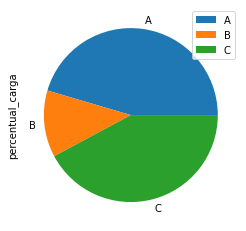

In [25]:
market_share.plot.pie(y='percentual_carga');

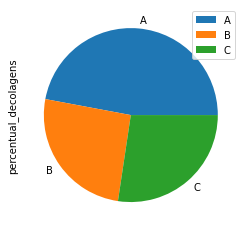

In [26]:
market_share.plot.pie(y='percentual_decolagens');

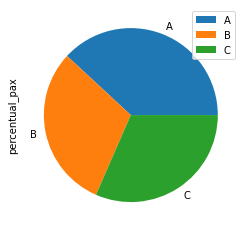

In [27]:
market_share.plot.pie(y='percentual_pax');

Com base nos dados e gráficos acime, podemos verificar que a empresa **B** teve menor market share das operções de cargas no período de janeiro a outubro de 2021.

# Análise - Parte 2

## Série histórica

Definição de dataframes para análise da série histórica de cada empresa.

In [28]:
serie_hist_a = df[df.empresa == 'A'].groupby(by='mês').sum().sort_values('mês').reset_index()
serie_hist_b = df[df.empresa == 'B'].groupby(by='mês').sum().sort_values('mês').reset_index()
serie_hist_c = df[df.empresa == 'C'].groupby(by='mês').sum().sort_values('mês').reset_index()

Gráficos das séries históricas de `carga_paga_kg`, `decolagens` e `passageiros_pagos`:

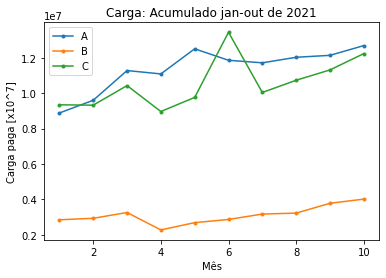

In [29]:
plt.plot(serie_hist_a['mês'], serie_hist_a['carga_paga_kg'], marker='.', label='A')
plt.plot(serie_hist_b['mês'], serie_hist_b['carga_paga_kg'], marker='.', label='B')
plt.plot(serie_hist_c['mês'], serie_hist_c['carga_paga_kg'], marker='.', label='C')
plt.xlabel('Mês')
plt.ylabel('Carga paga [x10^7]')
plt.title('Carga: Acumulado jan-out de 2021')
plt.legend()
plt.show()

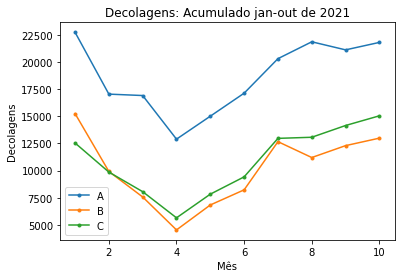

In [30]:
plt.plot(serie_hist_a['mês'], serie_hist_a['decolagens'], marker='.', label='A')
plt.plot(serie_hist_b['mês'], serie_hist_b['decolagens'], marker='.', label='B')
plt.plot(serie_hist_c['mês'], serie_hist_c['decolagens'], marker='.', label='C')
plt.xlabel('Mês')
plt.ylabel('Decolagens')
plt.title('Decolagens: Acumulado jan-out de 2021')
plt.legend()
plt.show()

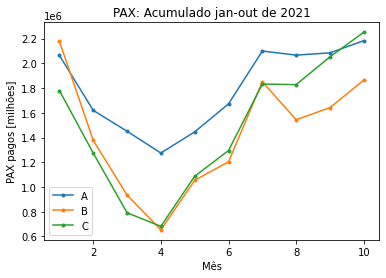

In [31]:
plt.plot(serie_hist_a['mês'], serie_hist_a['passageiros_pagos'], marker='.', label='A')
plt.plot(serie_hist_b['mês'], serie_hist_b['passageiros_pagos'], marker='.', label='B')
plt.plot(serie_hist_c['mês'], serie_hist_c['passageiros_pagos'], marker='.', label='C')
plt.xlabel('Mês')
plt.ylabel('PAX pagos [milhões]')
plt.title('PAX: Acumulado jan-out de 2021')
plt.legend()
plt.show()

## Rotas voadas

In [32]:
# Rotas únicas
rotas_a = df[df.empresa == 'A'].rota.unique()
rotas_b = df[df.empresa == 'B'].rota.unique()
rotas_c = df[df.empresa == 'C'].rota.unique()

# Número de rotas únicas
num_rotas_a = rotas_a.size
num_rotas_b = rotas_b.size
num_rotas_c = rotas_c.size

print('Empresa A: ' + str(num_rotas_a) + ' rotas')
print('Empresa B: ' + str(num_rotas_b) + ' rotas')
print('Empresa C: ' + str(num_rotas_c) + ' rotas')

Empresa A: 783 rotas
Empresa B: 381 rotas
Empresa C: 297 rotas


## Fluxo de carga por rota

Método (query) para consolidar os dados para avaliação do fluxo de carga paga:

In [33]:
fluxo_carga_a = df[df.empresa == 'A'].groupby(by='rota').sum().sort_values('carga_paga_kg', ascending=False).reset_index()
fluxo_carga_b = df[df.empresa == 'B'].groupby(by='rota').sum().sort_values('carga_paga_kg', ascending=False).reset_index()
fluxo_carga_c = df[df.empresa == 'C'].groupby(by='rota').sum().sort_values('carga_paga_kg', ascending=False).reset_index()

fluxo_carga_a['fluxo_carga_percentual'] = round(fluxo_carga_a.carga_paga_kg / fluxo_carga_a.carga_paga_kg.sum() * 100, 1)
fluxo_carga_b['fluxo_carga_percentual'] = round(fluxo_carga_b.carga_paga_kg / fluxo_carga_b.carga_paga_kg.sum() * 100, 1)
fluxo_carga_c['fluxo_carga_percentual'] = round(fluxo_carga_c.carga_paga_kg / fluxo_carga_c.carga_paga_kg.sum() * 100, 1)

Método para filtrar somente as rotas em que houve carga paga transportada:

In [34]:
fluxo_carga_a = fluxo_carga_a[fluxo_carga_a.carga_paga_kg > 0]

In [35]:
fluxo_carga_b = fluxo_carga_b[fluxo_carga_b.carga_paga_kg > 0]

In [36]:
fluxo_carga_c = fluxo_carga_c[fluxo_carga_c.carga_paga_kg > 0]

Vamos avaliar as 10 rotas que mais transportaram carga paga.

In [37]:
# Empresa A
fluxo_carga_a[['rota', 'passageiros_pagos', 'carga_paga_kg', 'decolagens', 'fluxo_carga_percentual']].head()

,rota,passageiros_pagos,carga_paga_kg,decolagens,fluxo_carga_percentual
0,MAOVCP,166285.0,16211778.0,1279.0,14.3
1,VCPMAO,150758.0,14434231.0,1106.0,12.7
2,VCPREC,236349.0,8345222.0,1275.0,7.3
3,VCPBEL,96093.0,3058698.0,730.0,2.7
4,RECVCP,246021.0,2641721.0,1239.0,2.3


In [38]:
# Empresa B
fluxo_carga_b[['rota', 'passageiros_pagos', 'carga_paga_kg', 'decolagens', 'fluxo_carga_percentual']].head()

,rota,passageiros_pagos,carga_paga_kg,decolagens,fluxo_carga_percentual
0,GRUBSB,163972.0,1082828.0,1189.0,3.5
1,CGHBSB,139755.0,928132.0,1088.0,3.0
2,GRUREC,166898.0,760252.0,1030.0,2.4
3,GRUFOR,153410.0,729613.0,977.0,2.4
4,GRUSSA,160543.0,715733.0,1076.0,2.3


In [39]:
# Empresa C
fluxo_carga_c[['rota', 'passageiros_pagos', 'carga_paga_kg', 'decolagens', 'fluxo_carga_percentual']].head()

,rota,passageiros_pagos,carga_paga_kg,decolagens,fluxo_carga_percentual
0,GRUMAO,133602.0,17256094.0,1168.0,16.3
1,MAOGRU,140302.0,16280701.0,1130.0,15.4
2,FORGRU,225953.0,3614836.0,1392.0,3.4
3,RECGRU,211268.0,2937169.0,1239.0,2.8
4,GRUSSA,223973.0,2477669.0,1464.0,2.3


Podemos observar que na operação da **empresa A**, as rotas **MAO-VCP** e **VCP-MAO** representam 27% do seu fluxo total de carga paga sendo as demais rotas menos do que 8%.

A **empresa C** também opera de forma similar, com as rotas **GRU-MAO** e **MAO-GRU** representando 31,7% do seu fluxo total de carga paga e as demais rotas representando menos do que 4%.

Outro ponto que pode ser observar é a repetição do aeroporto de VCP para a empresa A e o aeroporto de GRU para a empresa C. Isso é um indicativo de que essas duas empresas atuam em hubs distintos

Já a **empresa B**, que é a que tem o menor market share de cargas, 



In [40]:
# plt.scatter(x=fluxo_carga_a['rota'], y=fluxo_carga_a['fluxo_carga_percentual'], label='A')
# plt.plot(serie_hist_b['passageiros_pagos'], label='B')
# plt.plot(serie_hist_c['passageiros_pagos'], label='C')
# plt.legend()
# plt.show()

In [41]:
df[(df['mês'] == 5) & (df.passageiros_pagos > 0) & (df.carga_paga_kg > 0) & (df['empresa'] == 'A')]

,empresa,ano,mês,origem,aeroporto_origem,destion,aeroporto_destino,tipo_voo,passageiros_pagos,carga_paga_kg,decolagens,rota,carga_por_decolagem,pax_por_decolagem
2509,A,2021,5,JTC,AREALVA,VCP,CAMPINAS,DOMÉSTICA,1703.0,505.0,29.0,JTCVCP,17.413793,58.724138
2512,A,2021,5,AJU,ARACAJU,VCP,CAMPINAS,DOMÉSTICA,315.0,247.0,3.0,AJUVCP,82.333333,105.000000
2514,A,2021,5,AJU,ARACAJU,REC,RECIFE,DOMÉSTICA,5177.0,5075.0,99.0,AJUREC,51.262626,52.292929
2515,A,2021,5,AFL,ALTA FLORESTA,CGB,VÁRZEA GRANDE,DOMÉSTICA,1434.0,1315.0,14.0,AFLCGB,93.928571,102.428571
2517,A,2021,5,ARU,ARAÇATUBA,VCP,CAMPINAS,DOMÉSTICA,1950.0,2088.0,43.0,ARUVCP,48.558140,45.348837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,A,2021,5,GGB,ÁGUA BOA,CGB,VÁRZEA GRANDE,DOMÉSTICA,72.0,1319.0,10.0,GGBCGB,131.900000,7.200000
10535,A,2021,5,GGB,ÁGUA BOA,SXO,SÃO FÉLIX DO ARAGUAIA,DOMÉSTICA,52.0,938.0,10.0,GGBSXO,93.800000,5.200000
10536,A,2021,5,JIA,JUÍNA,CGB,VÁRZEA GRANDE,DOMÉSTICA,18.0,285.0,2.0,JIACGB,142.500000,9.000000
10537,A,2021,5,JIA,JUÍNA,TGQ,TANGARÁ DA SERRA,DOMÉSTICA,76.0,1072.0,10.0,JIATGQ,107.200000,7.600000


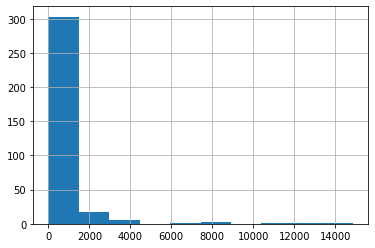

In [42]:
df[(df['mês'] == 5) & (df.passageiros_pagos > 0) & (df.carga_paga_kg > 0) & (df['empresa'] == 'A')].carga_por_decolagem.hist()

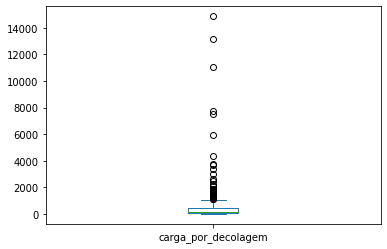

In [43]:
df[(df['mês'] == 5) & (df.passageiros_pagos > 0) & (df.carga_paga_kg > 0) & (df['empresa'] == 'A')].carga_por_decolagem.plot.box()

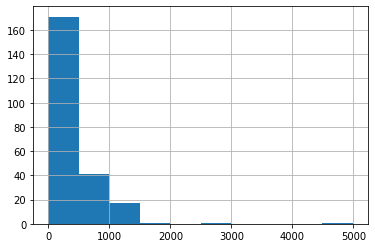

In [44]:
df[(df['mês'] == 5) & (df.passageiros_pagos > 0) & (df.carga_paga_kg > 0) & (df['empresa'] == 'B')].carga_por_decolagem.hist()

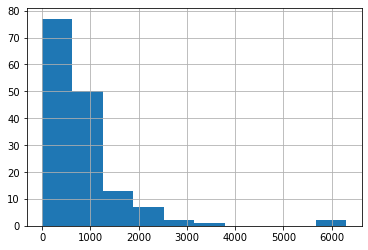

In [45]:
df[(df['mês'] == 5) & (df.passageiros_pagos > 0) & (df.carga_paga_kg > 0) & (df['empresa'] == 'C')].carga_por_decolagem.hist()